# Sentiment Analysis with TextBlob

In [32]:
# Installing TextBlob
!pip install TextBlob

In [3]:
# Importing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from sklearn.metrics import confusion_matrix, accuracy_score

## Load Data

In [4]:
# These data are preprocessed data
synthetic_train_deep_learining=pd.read_csv('synthetic_train_deep_learining.csv')
synthetic_test_deep_learining=pd.read_csv('synthetic_test_deep_learining.csv')

In [5]:
synthetic_train_deep_learining.head()

,sentence,sentiment,topic,sentiment_label
0,reporter country great idea,negative,facility,0
1,university musical artistic facility excellent,neutral,facility,1
2,classroom designed respond different student need,neutral,curriculum,1
3,program helped become expert field field,positive,curriculum,2
4,think program book record student realize many...,neutral,curriculum,1


In [6]:
# Combine the DataFrames
combined_df = pd.concat([synthetic_train_deep_learining, synthetic_test_deep_learining], ignore_index=True)
# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_synthetic_deep_learning.csv', index=False)
combined_df.shape

(10180, 4)

C:\Users\ashik\AppData\Local\Temp\ipykernel_13956\1385649526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


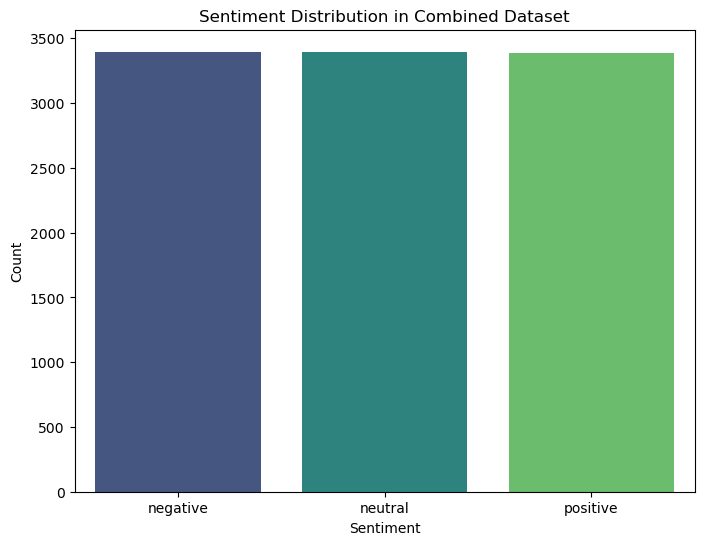

In [7]:
# Assuming there's a column named 'sentiment' with values 'positive', 'negative', 'neutral'
sentiment_counts = combined_df['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution in Combined Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show();

In [8]:
topic_counts = combined_df['topic'].value_counts()

C:\Users\ashik\AppData\Local\Temp\ipykernel_13956\1712054453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="plasma")


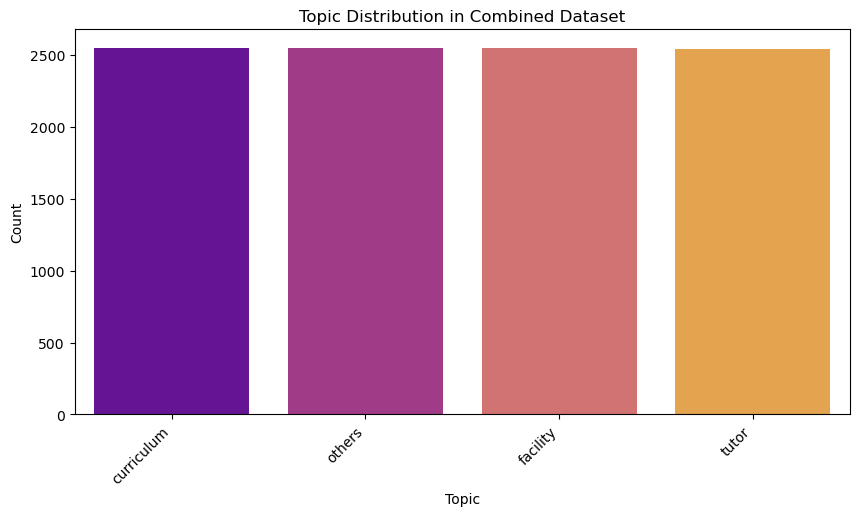

In [9]:
# Plotting Topic Distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="plasma")
plt.title("Topic Distribution in Combined Dataset")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

## Sentimant Analysis using TextBlob

In [10]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return polarity

In [11]:
def get_subjectivity(text):
    analysis = TextBlob(text)
    subjectivity = analysis.sentiment.subjectivity
    return subjectivity

In [12]:
type(combined_df['sentence'])

pandas.core.series.Series

In [13]:
combined_df['sentence'][0]

'reporter country great idea'

In [15]:
print(f"Polarity:{get_sentiment(combined_df['sentence'][0])}")
print(f"subjectivity:{get_subjectivity(combined_df['sentence'][0])}")

Polarity:0.8
subjectivity:0.75


In [16]:
# Convert the 'sentence' column to strings
combined_df['sentence'] = combined_df['sentence'].astype(str)
combined_df['polarity_score']=combined_df['sentence'].apply(get_sentiment)

In [18]:
combined_df['subjectivity_score'] = combined_df['sentence'].apply(get_subjectivity)

In [21]:
combined_df

,sentence,sentiment,topic,sentiment_label,polarity_score,subjectivity_score
0,reporter country great idea,negative,facility,0,0.800000,0.750000
1,university musical artistic facility excellent,neutral,facility,1,0.444444,0.666667
2,classroom designed respond different student need,neutral,curriculum,1,0.000000,0.600000
3,program helped become expert field field,positive,curriculum,2,0.000000,0.000000
4,think program book record student realize many...,neutral,curriculum,1,0.500000,0.500000
...,...,...,...,...,...,...
10175,teaching teacher find much money isbut expensi...,neutral,curriculum,1,0.100000,0.566667
10176,university computer facility uptodate wellmain...,neutral,facility,1,0.000000,0.000000
10177,spiritualization form appreciation interpretat...,negative,curriculum,0,-0.500000,1.000000
10178,detailed quite bit detailed analysis,positive,others,2,0.400000,0.750000


In [22]:
combined_df['polarity_score'].value_counts()

polarity_score
 0.000000    4106
 0.200000     455
 0.500000     436
 0.400000     296
-0.500000     251
             ... 
-0.086667       1
-0.116667       1
-0.016667       1
-0.255556       1
-0.181818       1
Name: count, Length: 663, dtype: int64

## Analysis the Results

### Sentimant/Polarity

Polarity measures the sentiment of a text, indicating whether it is positive, negative, or neutral. A score close to 1 suggests positive sentiment, a score close to -1 indicates negative sentiment, and a score around 0 reflects neutrality.

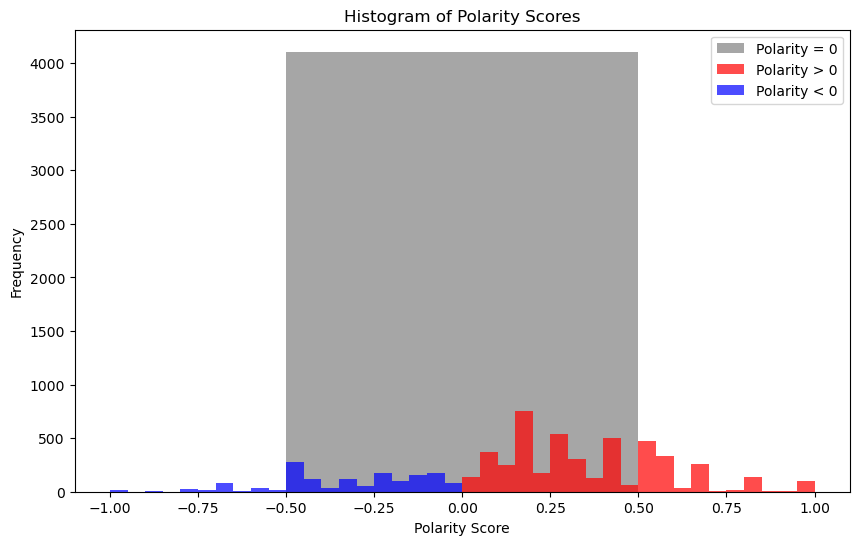

In [23]:
# Categorize polarity scores
polarity_zero = combined_df[combined_df['polarity_score'] == 0]
polarity_positive = combined_df[combined_df['polarity_score'] > 0]
polarity_negative = combined_df[combined_df['polarity_score'] < 0]

# Plot the histogram
plt.figure(figsize=(10, 6))

# Histogram for polarity = 0
plt.hist(polarity_zero['polarity_score'], bins=1, alpha=0.7, label='Polarity = 0', color='grey')

# Histogram for polarity > 0
plt.hist(polarity_positive['polarity_score'], bins=20, alpha=0.7, label='Polarity > 0', color='red')

# Histogram for polarity < 0
plt.hist(polarity_negative['polarity_score'], bins=20, alpha=0.7, label='Polarity < 0', color='blue')

# Adding labels and title
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Polarity Scores')
plt.legend()

# Show the plot
plt.show()

In [24]:
combined_df.sentiment.value_counts()

sentiment
negative    3397
neutral     3394
positive    3389
Name: count, dtype: int64

The function `classify_polarity` is designed to categorize the sentiment polarity of a text into three labels: 'negative', 'positive', or 'neutral'. It assigns 'negative' to polarities less than 0, 'positive' to polarities greater than 0, and 'neutral' to a polarity exactly equal to 0. This function is applied to the `polarity_score` column of the `student_feedback` DataFrame to create a new column, `testBlob_label`, which contains the sentiment classification for each entry.

In [28]:
# Define the conditions and corresponding labels
def classify_polarity(polarity):
    if polarity < 0:
        return 'negative'
    elif polarity > 0:
        return 'positive'
    else:
        return 'neutral'

In [29]:
# Apply the function to create the 'testBlob_label' column
combined_df['testBlob_label'] = combined_df['polarity_score'].apply(classify_polarity)

In [30]:
combined_df['testBlob_label'].value_counts()

testBlob_label
positive    4586
neutral     4106
negative    1488
Name: count, dtype: int64

In [31]:
def calculate_sentiment_accuracy(df, true_label_col, predicted_label_col):
    """
    Calculate and print the overall accuracy and accuracy for each sentiment category.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the true and predicted labels.
    - true_label_col (str): The column name for the true sentiment labels.
    - predicted_label_col (str): The column name for the predicted sentiment labels.
    """
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(df[true_label_col], df[predicted_label_col], labels=['positive', 'negative', 'neutral'])
    
    # Create a DataFrame to better visualize the confusion matrix
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['positive', 'negative', 'neutral'], columns=['positive', 'negative', 'neutral'])

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(df[true_label_col], df[predicted_label_col])

    # Calculate accuracy for each sentiment category
    positive_accuracy = conf_matrix_df.loc['positive', 'positive'] / conf_matrix_df.loc['positive'].sum()
    negative_accuracy = conf_matrix_df.loc['negative', 'negative'] / conf_matrix_df.loc['negative'].sum()
    neutral_accuracy = conf_matrix_df.loc['neutral', 'neutral'] / conf_matrix_df.loc['neutral'].sum()

    # Print the results
    print("Confusion Matrix:")
    print(conf_matrix_df)
    print("\nOverall Accuracy: {:.2f}".format(overall_accuracy))
    print("Positive Accuracy: {:.2f}".format(positive_accuracy))
    print("Negative Accuracy: {:.2f}".format(negative_accuracy))
    print("Neutral Accuracy: {:.2f}".format(neutral_accuracy))

In [32]:
calculate_sentiment_accuracy(combined_df, 'sentiment', 'testBlob_label')

Confusion Matrix:
          positive  negative  neutral
positive      1858       483     1048
negative      1147       572     1678
neutral       1581       433     1380

Overall Accuracy: 0.37
Positive Accuracy: 0.55
Negative Accuracy: 0.17
Neutral Accuracy: 0.41


In [34]:
# Define the conditions and corresponding labels
def classify_polarity(polarity):
    if polarity < -0.1:
        return 'negative'
    elif polarity > 0.1:
        return 'positive'
    else:
        return 'neutral'

combined_df['testBlob_label_1'] = combined_df['polarity_score'].apply(classify_polarity)
combined_df['testBlob_label'].value_counts()

testBlob_label
positive    4586
neutral     4106
negative    1488
Name: count, dtype: int64

### Subjectivity
Subjectivity measures how much a text expresses personal opinions, emotions, or biases, rather than objective facts. A score close to 0 indicates objectivity, while a score close to 1 indicates high subjectivity.

In [35]:
# Define the bins for subjectivity scores
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

# Create a new column for the binned subjectivity scores
combined_df['subjectivity_range'] = pd.cut(combined_df['subjectivity_score'], bins=bins, labels=labels, include_lowest=True)

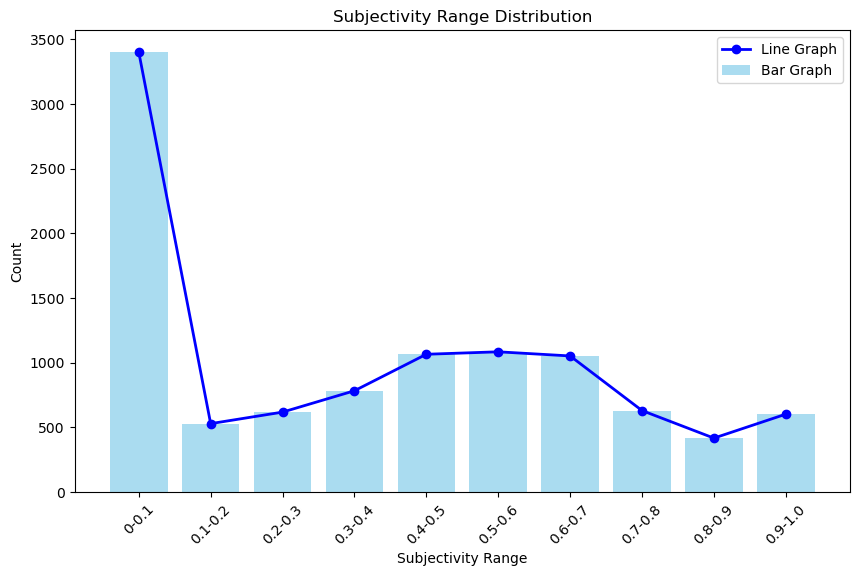

In [36]:
# Count the number of occurrences in each subjectivity range
subjectivity_counts = combined_df['subjectivity_range'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

# Bar graph
plt.bar(subjectivity_counts.index, subjectivity_counts.values, color='skyblue', alpha=0.7, label='Bar Graph')

# Line graph
plt.plot(subjectivity_counts.index, subjectivity_counts.values, color='blue', marker='o', linestyle='-', linewidth=2, label='Line Graph')

# Titles and labels
plt.title('Subjectivity Range Distribution')
plt.xlabel('Subjectivity Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()